In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Create folder for charts
if not os.path.exists("charts"):
    os.makedirs("charts")

In [ ]:
# Load dataset
df = pd.read_csv("SafetyIncidents.csv")

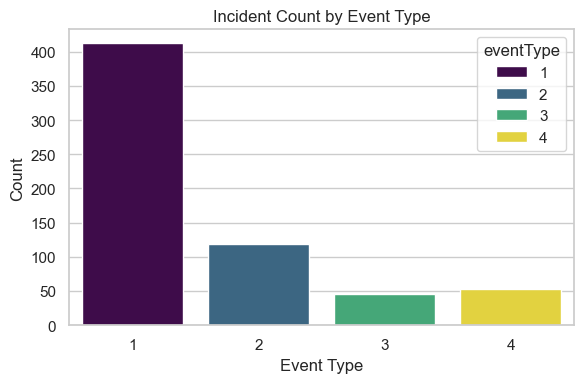

In [5]:
# -----------------------------------
# 1. Incident Type Analysis
# -----------------------------------
event_counts = df['eventType'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=event_counts.index, y=event_counts.values,hue=event_counts.index ,palette="viridis")
plt.title("Incident Count by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("charts/incident_count_event_type.png")
plt.show()

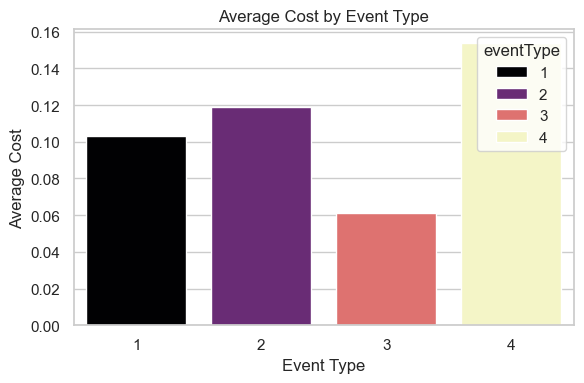

In [6]:
# -----------------------------------
# 2. Average Cost by Event Type
# -----------------------------------
avg_cost = df.groupby('eventType')['normalCost'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='eventType', y='normalCost', data=avg_cost,hue='eventType' ,palette="magma")
plt.title("Average Cost by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Average Cost")
plt.tight_layout()
plt.savefig("charts/avg_cost_event_type.png")
plt.show()

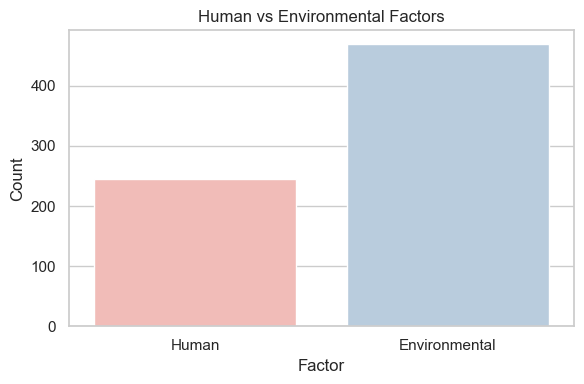

In [8]:
# -------------------------------
# 3. Human vs Environmental Factors
# -------------------------------
human_factors = df['Human Factor_Position Inappropriate For Task'] + df['Human Factor_Other']
env_factors = df['Environmental Factor_Other'] + df['Environmental Factor_Work-Surface/Facility-Layout Condition']
factor_counts = pd.DataFrame({
    'Factor': ['Human', 'Environmental'],
    'Count': [human_factors.sum(), env_factors.sum()]
})
plt.figure(figsize=(6,4))
sns.barplot(x='Factor', y='Count', data=factor_counts,hue='Factor' ,palette="Pastel1")
plt.title("Human vs Environmental Factors")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("charts/human_vs_env_factors.png")
plt.show()

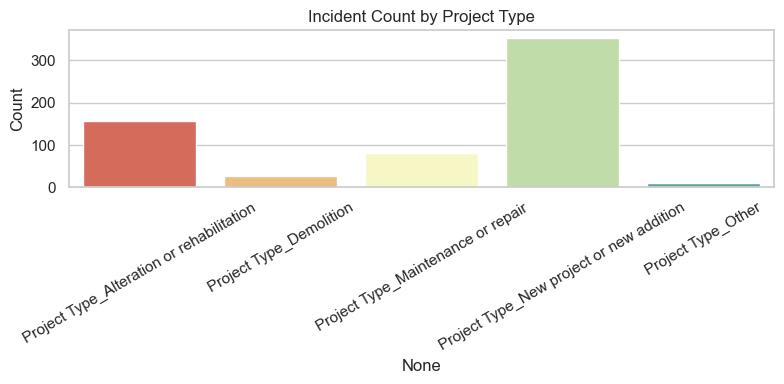

In [10]:
# -------------------------------
# 4. Project Type Analysis
# -------------------------------
project_cols = [
    'Project Type_Alteration or rehabilitation',
    'Project Type_Demolition',
    'Project Type_Maintenance or repair',
    'Project Type_New project or new addition',
    'Project Type_Other'
]
project_counts = df[project_cols].sum()
plt.figure(figsize=(8,4))
sns.barplot(x=project_counts.index, y=project_counts.values,hue=project_counts.index ,palette="Spectral")
plt.title("Incident Count by Project Type")
plt.xticks(rotation=30)
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("charts/incident_by_project_type.png")
plt.show()

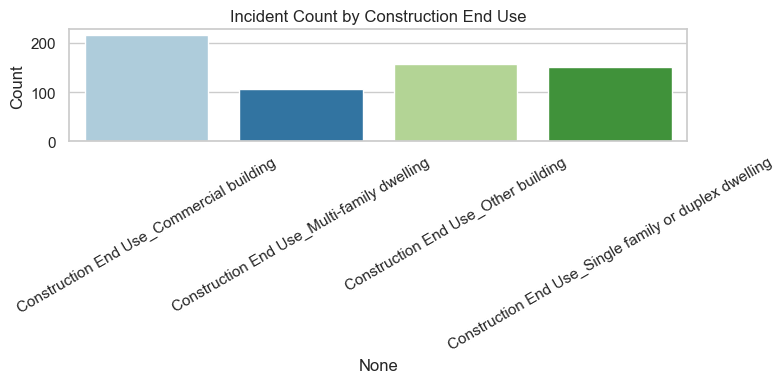

In [14]:
# -------------------------------
# 5. Construction End Use Analysis
# -------------------------------
construction_cols = [
    'Construction End Use_Commercial building',
    'Construction End Use_Multi-family dwelling',
    'Construction End Use_Other building',
    'Construction End Use_Single family or duplex dwelling'
]
construction_counts = df[construction_cols].sum()
plt.figure(figsize=(8,4))
sns.barplot(x=construction_counts.index, y=construction_counts.values,hue=construction_counts.index ,palette="Paired")
plt.title("Incident Count by Construction End Use")
plt.xticks(rotation=30)
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("charts/incident_by_construction_end_use.png")
plt.show()

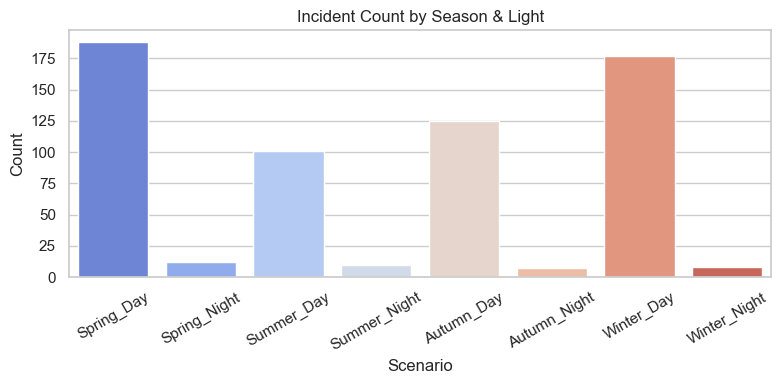

In [16]:
# -------------------------------
# 6. Season & Light Effects
# -------------------------------
season_light_counts = pd.DataFrame({
    'Scenario': ['Spring_Day','Spring_Night','Summer_Day','Summer_Night',
                 'Autumn_Day','Autumn_Night','Winter_Day','Winter_Night'],
    'Count': [
        df[(df['Season_Spring']==1) & (df['Light_Day']==1)].shape[0],
        df[(df['Season_Spring']==1) & (df['Light_Night']==1)].shape[0],
        df[(df['Season_Summer']==1) & (df['Light_Day']==1)].shape[0],
        df[(df['Season_Summer']==1) & (df['Light_Night']==1)].shape[0],
        df[(df['Season_Autumn']==1) & (df['Light_Day']==1)].shape[0],
        df[(df['Season_Autumn']==1) & (df['Light_Night']==1)].shape[0],
        df[(df['Season_Winter']==1) & (df['Light_Day']==1)].shape[0],
        df[(df['Season_Winter']==1) & (df['Light_Night']==1)].shape[0]
    ]
})
plt.figure(figsize=(8,4))
sns.barplot(x='Scenario', y='Count', data=season_light_counts,hue='Scenario' ,palette="coolwarm")
plt.title("Incident Count by Season & Light")
plt.xticks(rotation=30)
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("charts/season_light_interaction.png")
plt.show()

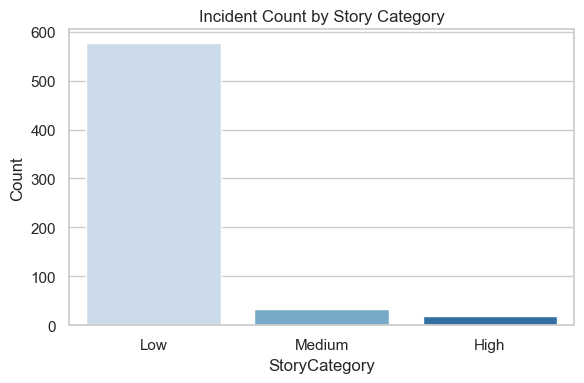

In [17]:
# -------------------------------
# 7. normalStory Distribution
# -------------------------------
def categorize_story(value):
    if value < 0.1:
        return 'Very Low'
    elif value <= 0.5:
        return 'Low'
    elif value <= 1:
        return 'Medium'
    else:
        return 'High'

df['StoryCategory'] = df['normalStory'].apply(categorize_story)
story_counts = df['StoryCategory'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=story_counts.index, y=story_counts.values,hue=story_counts.index ,palette="Blues")
plt.title("Incident Count by Story Category")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("charts/story_category.png")
plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_12792\2030067890.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(complex_counts.keys()), y=list(complex_counts.values()), palette="Set3")


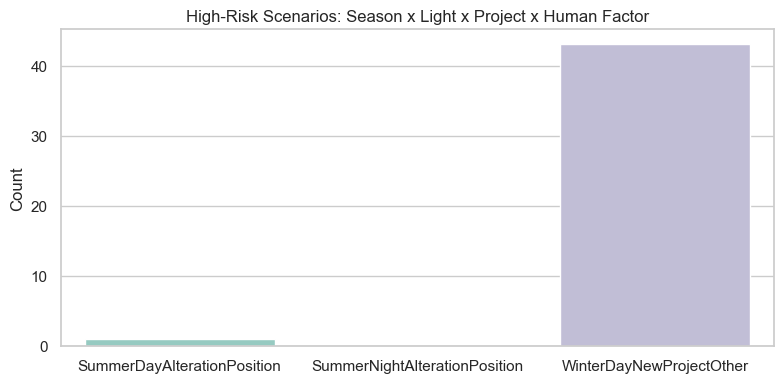

In [18]:
# -------------------------------
# 8. High-Risk Scenarios: Season x Light x Project x Human Factor
# -------------------------------
complex_cols = [
    ('Season_Summer','Light_Day','Project Type_Alteration or rehabilitation','Human Factor_Position Inappropriate For Task','SummerDayAlterationPosition'),
    ('Season_Summer','Light_Night','Project Type_Alteration or rehabilitation','Human Factor_Position Inappropriate For Task','SummerNightAlterationPosition'),
    ('Season_Winter','Light_Day','Project Type_New project or new addition','Human Factor_Other','WinterDayNewProjectOther')
]
complex_counts = {}
for season, light, project, human, name in complex_cols:
    complex_counts[name] = df[(df[season]==1) & (df[light]==1) & (df[project]==1) & (df[human]==1)].shape[0]

plt.figure(figsize=(8,4))
sns.barplot(x=list(complex_counts.keys()), y=list(complex_counts.values()), palette="Set3")
plt.title("High-Risk Scenarios: Season x Light x Project x Human Factor")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("charts/high_risk_scenarios.png")
plt.show()

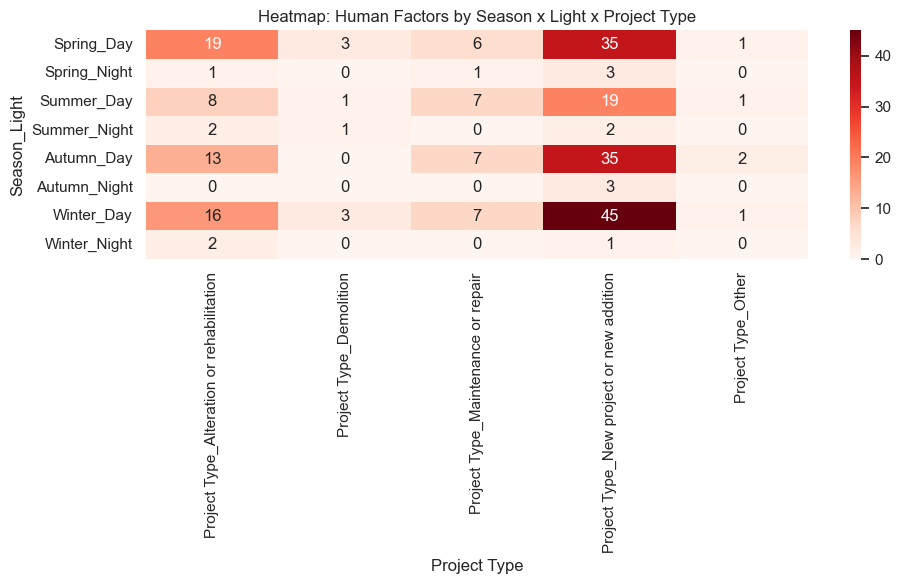

In [19]:
# -------------------------------
# 9. Heatmaps for Human & Environmental Factors
# -------------------------------
project_cols = [
    'Project Type_Alteration or rehabilitation',
    'Project Type_Demolition',
    'Project Type_Maintenance or repair',
    'Project Type_New project or new addition',
    'Project Type_Other'
]
season_light_combos = ['Spring_Day','Spring_Night','Summer_Day','Summer_Night','Autumn_Day','Autumn_Night','Winter_Day','Winter_Night']
human_cols = ['Human Factor_Position Inappropriate For Task','Human Factor_Other']
env_cols = ['Environmental Factor_Other','Environmental Factor_Work-Surface/Facility-Layout Condition']

# Initialize DataFrames
human_heatmap = pd.DataFrame(index=season_light_combos, columns=project_cols)
env_heatmap = pd.DataFrame(index=season_light_combos, columns=project_cols)

# Fill DataFrames
for season in ['Season_Spring','Season_Summer','Season_Autumn','Season_Winter']:
    for light in ['Light_Day','Light_Night']:
        sl_name = f"{season.split('_')[1]}_{light.split('_')[1]}"
        for project in project_cols:
            human_heatmap.loc[sl_name, project] = df[
                (df[season]==1) & (df[light]==1) & ((df[human_cols[0]]==1)|(df[human_cols[1]]==1)) & (df[project]==1)
            ].shape[0]
            env_heatmap.loc[sl_name, project] = df[
                (df[season]==1) & (df[light]==1) & ((df[env_cols[0]]==1)|(df[env_cols[1]]==1)) & (df[project]==1)
            ].shape[0]

human_heatmap = human_heatmap.astype(float)
env_heatmap = env_heatmap.astype(float)

# Plot Human Factors Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(human_heatmap, annot=True, fmt=".0f", cmap="Reds")
plt.title("Heatmap: Human Factors by Season x Light x Project Type")
plt.ylabel("Season_Light")
plt.xlabel("Project Type")
plt.tight_layout()
plt.savefig("charts/heatmap_human_factors.png")
plt.show()

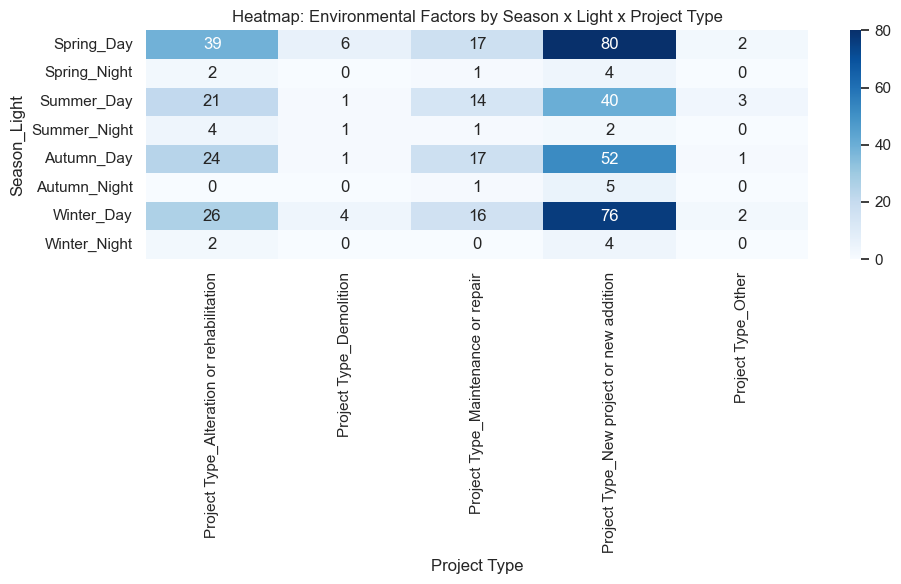

In [20]:
# Plot Environmental Factors Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(env_heatmap, annot=True, fmt=".0f", cmap="Blues")
plt.title("Heatmap: Environmental Factors by Season x Light x Project Type")
plt.ylabel("Season_Light")
plt.xlabel("Project Type")
plt.tight_layout()
plt.savefig("charts/heatmap_environmental_factors.png")
plt.show()

In [ ]:
df.columns